# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
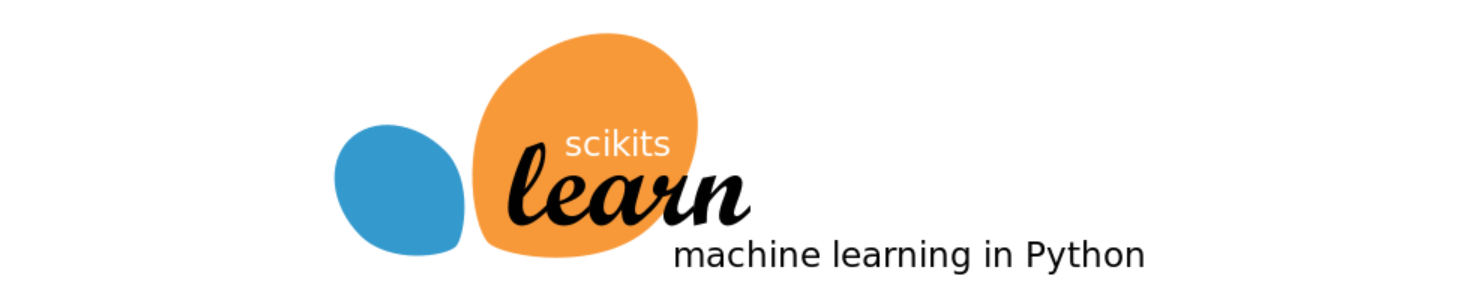

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(404, 13)

# 4. Simple Linear Model

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
model.score(X_train,y_train)

0.732380594773455

In [8]:
model.score(X_test,y_test)

0.7702985448160151

In [9]:
model.intercept_

36.94956774170126

In [10]:
model.coef_

array([-1.12932278e-01,  4.36088317e-02,  1.38846907e-02,  2.84387494e+00,
       -1.84734572e+01,  3.84405837e+00, -2.18373865e-03, -1.54520002e+00,
        3.17304637e-01, -1.30872654e-02, -8.99205543e-01,  7.55644519e-03,
       -5.16431913e-01])

In [11]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [12]:
modelp = LinearRegression()
modelp.fit(X_train_poly,y_train)

LinearRegression()

In [13]:
modelp.score(X_train_poly,y_train)

0.9312489835136141

In [14]:
modelp.score(X_test_poly,y_test)

0.8643841789839124

# 5. Ridge Regularization for Linear Model

In [15]:
from sklearn.linear_model import Ridge

modelr = Ridge(alpha=10000)
modelr.fit(X_train_poly,y_train)

Ridge(alpha=10000)

In [16]:
modelr.score(X_train_poly,y_train)

0.8865726233100065

In [17]:
modelr.score(X_test_poly,y_test)

0.8296344893699856

# 6. Lasso Regularization for Linear Model

In [18]:
from sklearn.linear_model import Lasso

modelL = Lasso(alpha=1.0)
modelL.fit(X_train_poly,y_train)

C:\Users\Kuenga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2250.580050685936, tolerance: 3.4166786608910886
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [19]:
modelL.score(X_train_poly,y_train)

0.8881974901132356

In [20]:
modelL.score(X_test_poly,y_test)

0.8155205012081681

### Conclusion

# 7. Polynomial Regression of degree 2

# 8. Ridge Regularization for Polynomial model

# 9. Lasso Regularization for Polynomial model

# 10. Select K Best

In [21]:
## Impleating feature selection using SelectKBest Class
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature selection
kb = SelectKBest(score_func=f_regression,k=7)

#apply feature selection
X_selected = kb.fit_transform(X,y)
X_selected.shape

(506, 7)

In [22]:
X.shape

(506, 13)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,random_state=10)
X_train.shape

(379, 7)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
lr.score(X_train,y_train)

0.6928056113534823

In [26]:
lr.score(X_test,y_test)

0.6395889086572535

### Feature Selection - Pearson's Correlation Coefficient

In [27]:
df = pd.DataFrame(data=X,columns=boston.feature_names)
df['y'] = y
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT     y  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [28]:
corr = df.corr()
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
y       -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT         y  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
y        0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

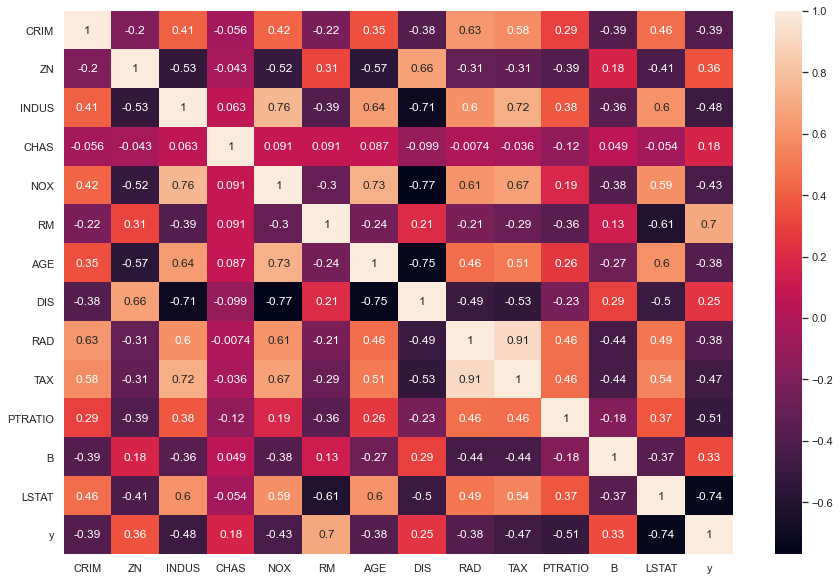

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [30]:
columns = ['RM','LSTAT','PTRATIO','INDUS','TAX','NOX','CRIM']

In [31]:
sdf = df[columns]
sdf.head()

RM  LSTAT  PTRATIO  INDUS    TAX    NOX     CRIM
0  6.575   4.98     15.3   2.31  296.0  0.538  0.00632
1  6.421   9.14     17.8   7.07  242.0  0.469  0.02731
2  7.185   4.03     17.8   7.07  242.0  0.469  0.02729
3  6.998   2.94     18.7   2.18  222.0  0.458  0.03237
4  7.147   5.33     18.7   2.18  222.0  0.458  0.06905

# 11. Conclusion

we have learned from TODO about regularization that even if there are many ways to regularizw a data set there are many diffrent methods to regularize the data set and get better results